# Lab 6.01 - Regression analysis

In [7]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [8]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


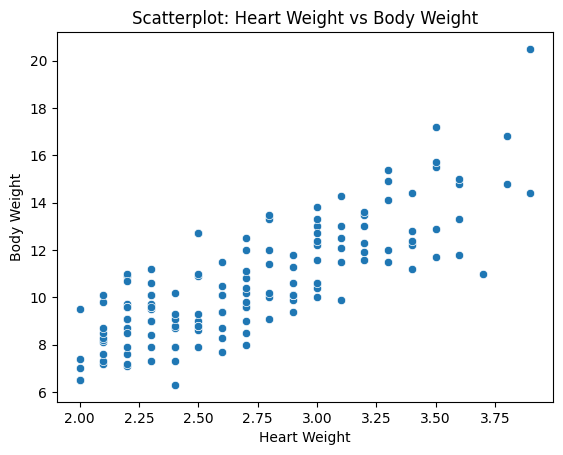

In [9]:
sns.scatterplot(data=cats, x='Hwt', y='Bwt')
plt.title('Scatterplot: Heart Weight vs Body Weight')
plt.xlabel('Heart Weight')
plt.ylabel('Body Weight')
plt.show()

3. Calculate and draw the regression line.


In [10]:
# Input omzetten in juiste vorm
X = cats['Hwt'].values.reshape(-1, 1)
y = cats['Bwt'].values
# Model fitten
model = LinearRegression().fit(X, y)

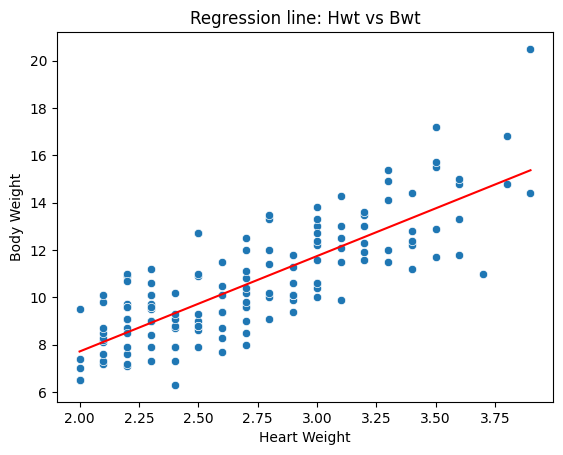

In [11]:
sns.scatterplot(x=cats['Hwt'], y=cats['Bwt'])
plt.plot(cats['Hwt'], model.predict(X), color='red')
plt.title('Regression line: Hwt vs Bwt')
plt.xlabel('Heart Weight')
plt.ylabel('Body Weight')
plt.show()

4. Calculate the correlation coefficient and the coefficient of determination.

In [12]:
# Correlatie (Pearson)
# Om de correlatiecoëfficiënt R te berekenen tussen hartgewicht (Hwt) en lichaamsgewicht (Bwt).
# [0][1] geeft de correlatie tussen x en y, wat je meestal nodig hebt.
cor = np.corrcoef(cats['Hwt'], cats['Bwt'])[0][1]
print(f"R = {cor:.4f}")

###### Als wij meerdere correlaties willen dan: 
# cor1 = np.corrcoef(cats['Hwt'], cats['Leeftijd'])[0][1]
# cor2 = np.corrcoef(cats['Bwt'], cats['Leeftijd'])[0][1]


# R-kwadraat via sklearn
# Om de coëfficiënt van determinatie R^2 te berekenen
r_squared = model.score(X, y)
print(f"R² = {r_squared:.4f}")


R = 0.8041
R² = 0.6466


5. Interpret the results from the previous steps.

` "Er is een sterk positief lineair verband tussen hartgewicht en lichaamsgewicht van katten (R = 0.80). Ongeveer 64% van de variatie in lichaamsgewicht wordt verklaard door hartgewicht (R² = 0.64)." `

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [13]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables for each gender.


**sns.lmplot(...)** is gebruikt omdat het automatisch een regressielijn én scatterplot per groep (hier: per gender) tekent, en dat kan handig zijn voor visuele analyse.

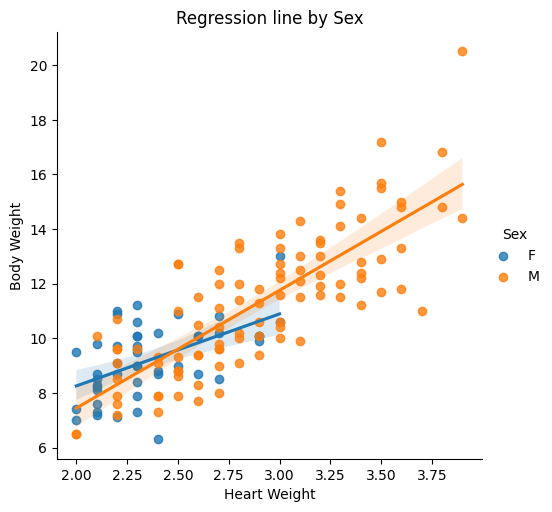

In [14]:
sns.lmplot(data=cats, x='Hwt', y='Bwt', hue='Sex')
plt.title('Regression line by Sex')
plt.xlabel('Heart Weight')
plt.ylabel('Body Weight')
plt.show()


3. Calculate and draw the regression line.


In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Loop over de geslachten
for sex, group in cats.groupby('Sex'):
    X = group['Hwt'].values.reshape(-1, 1)
    y = group['Bwt'].values

    # Model trainen
    model = LinearRegression().fit(X, y)

    # Bewaren van resultaten
    beta0 = model.intercept_
    beta1 = model.coef_[0]

    print(f"Geslacht: {sex}")
    print(f"Regressievergelijking: ŷ = {beta0:.2f} + {beta1:.2f}x")


Geslacht: F
Regressievergelijking: ŷ = 2.98 + 2.64x
Geslacht: M
Regressievergelijking: ŷ = -1.18 + 4.31x


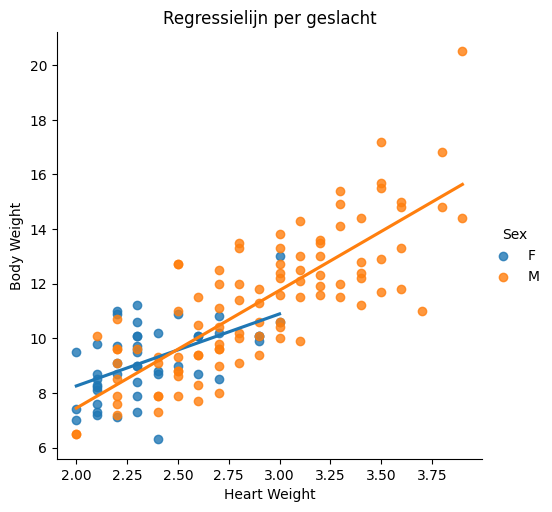

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Teken scatterplot en regressielijnen per geslacht
sns.lmplot(data=cats, x='Hwt', y='Bwt', hue='Sex', ci=None)
plt.title('Regressielijn per geslacht')
plt.xlabel('Heart Weight')
plt.ylabel('Body Weight')
plt.show()


4. Calculate the correlation coefficient and the coefficient of determination.


In [17]:
# Vervolg van de loop uit stap 3
# Correlatie (R)
cor = np.corrcoef(group['Hwt'], group['Bwt'])[0][1]

# Determinatiecoëfficiënt (R²)
r_squared = model.score(X, y)

print(f"  Correlatiecoëfficiënt (R): {cor:.4f}")
print(f"  Determinatiecoëfficiënt (R²): {r_squared:.4f}\n")


  Correlatiecoëfficiënt (R): 0.7930
  Determinatiecoëfficiënt (R²): 0.6289



5. Interpret the results from the previous steps.

```
Uit de scatterplot en regressieanalyse blijkt dat er voor beide geslachten een positief lineair verband is tussen hartgewicht en lichaamsgewicht.

Bij mannelijke katten ligt de regressielijn doorgaans wat hoger, wat erop wijst dat ze bij hetzelfde hartgewicht een groter lichaamsgewicht hebben dan vrouwelijke katten.

De correlatiecoëfficiënt R is voor beide geslachten positief en relatief hoog, wat een sterk lineair verband aanduidt.

De determinatiecoëfficiënt R² toont aan dat een aanzienlijk deel van de variatie in lichaamsgewicht verklaard wordt door hartgewicht – maar er blijft ook ruimte voor andere verklarende factoren.

Dit toont aan dat hartgewicht een betrouwbare voorspeller is van lichaamsgewicht, maar dat geslacht een mogelijke invloedfactor/moderator is.
```

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


###  ExamensTips:

####  Vraag:
**3. Calculate and draw the regression line**

---

###  Wat moet je doen:

#### 1. Bereken de regressielijn met `LinearRegression()`

```python
from sklearn.linear_model import LinearRegression

X = group['Hwt'].values.reshape(-1, 1)  # Onafhankelijke variabele (Hwt)
y = group['Bwt'].values                 # Afhankelijke variabele (Bwt)

model = LinearRegression().fit(X, y)

```

#### 2. Haal de parameters van de regressielijn op
```python
beta0 = model.intercept_
beta1 = model.coef_[0]

print(f"Regressielijn: ŷ = {beta0:.2f} + {beta1:.2f}x")
```

- Waarom?
    - We gebruiken LinearRegression om de beste rechte lijn (least squares line) te vinden.
    Deze lijn beschrijft het lineaire verband tussen hartgewicht (Hwt) en lichaamsgewicht (Bwt) met de formule:



#### 3. Teken de regressielijn per geslacht met sns.lmplot()
```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=cats, x='Hwt', y='Bwt', hue='Sex', ci=None)
plt.title('Regressielijn per geslacht')
plt.xlabel('Heart Weight')
plt.ylabel('Body Weight')
plt.show()
```

- Waarom?
    - Met sns.lmplot() kun je de regressielijnen voor elke groep (geslacht) visueel weergeven.
    Zo zie je meteen of het verband verschillend is voor mannelijke en vrouwelijke katten.